# BGS Moon Separation Sanity Check: Make sure the closer we are to the moon, the worse the redshift recovery gets.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack
from astropy.io import fits
import seaborn as sns
sns.set(style='white', font_scale=1.1, palette='deep')

In [2]:
from desiutil.log import get_logger, DEBUG
log = get_logger()

In [3]:
from desistudy_qa import qa_zmag, qa_efficiency, qa_zwarn4, qa_radec

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Just a few things we need to define to set things up

In [5]:
sim_names = ['sim06','sim16','sim26','sim36','sim46']

In [6]:
simdir = os.path.join(os.getenv('DESI_ROOT'), 'spectro', 'sim', 'bgs', 'kremin', 'flat_priors')

In [7]:
from desistudy_qa import get_all_sims_obs

sim_names = np.asarray(sim_names)
sims, conditions = get_all_sims_obs(sim_names)

# Analyze the outputs.

Sims [0-4]?6 have magnitude range 19.5-20 and z-range 0.1-0.8

Below the 

Sim 06 has moon sep of 120 degrees. Moon at 30 degrees above the horizon. Moon Frac 0.8. Exptime 480.

Sim 16 has moon sep of **60** degrees. Moon at 30 degrees above the horizon. Moon Frac 0.8. Exptime 480.

Sim 26 has moon sep of **20** degrees. Moon at 30 degrees above the horizon. Moon Frac 0.8. Exptime 480.

Sim 36 has moon sep of 20 degrees. Moon at **90** degrees above the horizon. Moon Frac **0.99**. Exptime 480.

Sim 46 has moon sep of 20 degrees. Moon at 90 degrees above the horizon. Moon Frac 0.99. Exptime **300**.



In [8]:
from desistudy_qa import print_file_locations
print_file_locations(simdir,sims)

In /global/project/projectdirs/desi/spectro/sim/bgs/kremin/flat_priors/ :
	In sim06/:
		   bgs-sim06-results.fits
	In sim16/:
		   bgs-sim16-results.fits
	In sim26/:
		   bgs-sim26-results.fits
	In sim36/:
		   bgs-sim36-results.fits
	In sim46/:
		   bgs-sim46-results.fits


## Sim 06

In [9]:
current_sim_name = 'sim06'

In [12]:
from desistudy_qa import print_sim_params
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim06
	Sim Parameters: 
		suffix: sim06
		use_mock: False
		nsim: 2
		nspec: 800
		zmin: 0.1
		zmax: 0.8
		rmagmin: 19.5
		rmagmax: 20.0
		seed: 984
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 120
		EXPTIME: 480
		MOONFRAC: 0.8


Sim: sim06 with nspec: 800 and nsim: 2
ObsConds ExpTime: 480, MoonFrac: 0.8, MoonAlt: 30, MoonSep: 120


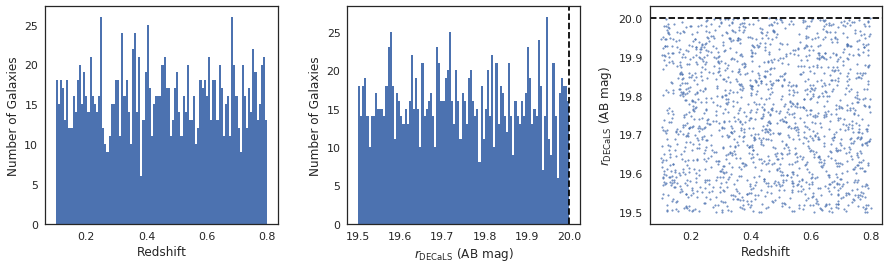

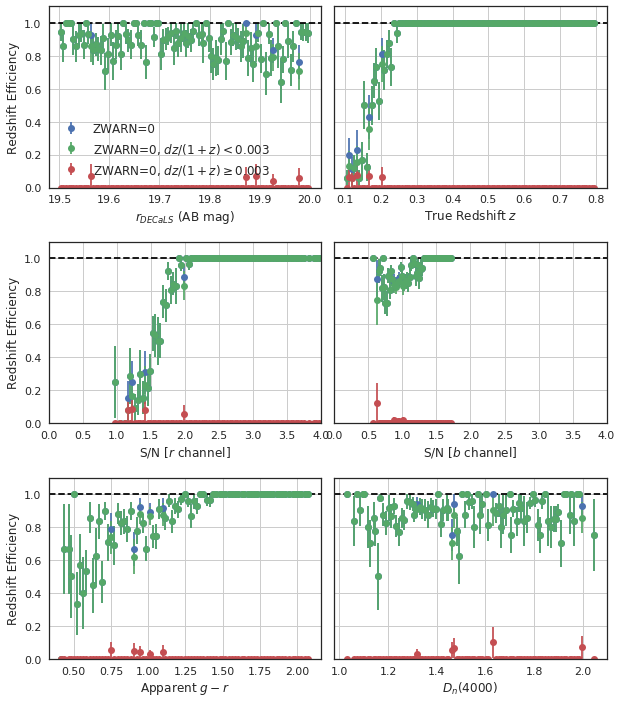

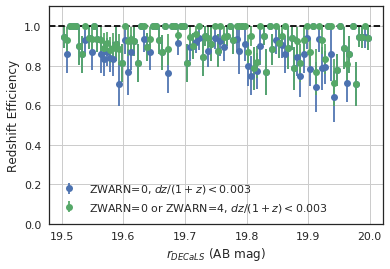

In [13]:
# sim 06
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        #result.pprint()
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=20.)
        qa_efficiency(result)
        qa_zwarn4(result)   

## Sim 16

In [14]:
current_sim_name = 'sim16'

In [15]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim16
	Sim Parameters: 
		suffix: sim16
		use_mock: False
		nsim: 2
		nspec: 800
		zmin: 0.1
		zmax: 0.8
		rmagmin: 19.5
		rmagmax: 20.0
		seed: 2624
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 60
		EXPTIME: 480
		MOONFRAC: 0.8


Sim: sim16 with nspec: 800 and nsim: 2
ObsConds ExpTime: 480, MoonFrac: 0.8, MoonAlt: 30, MoonSep: 60


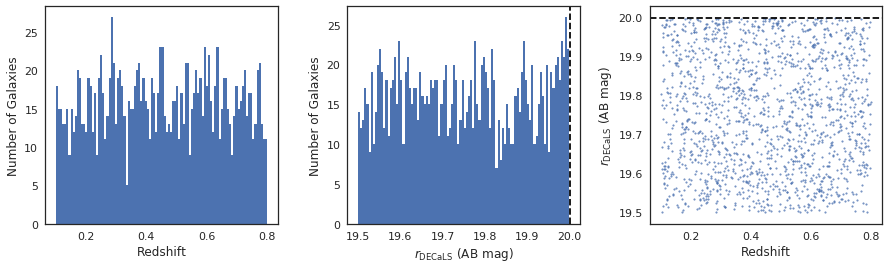

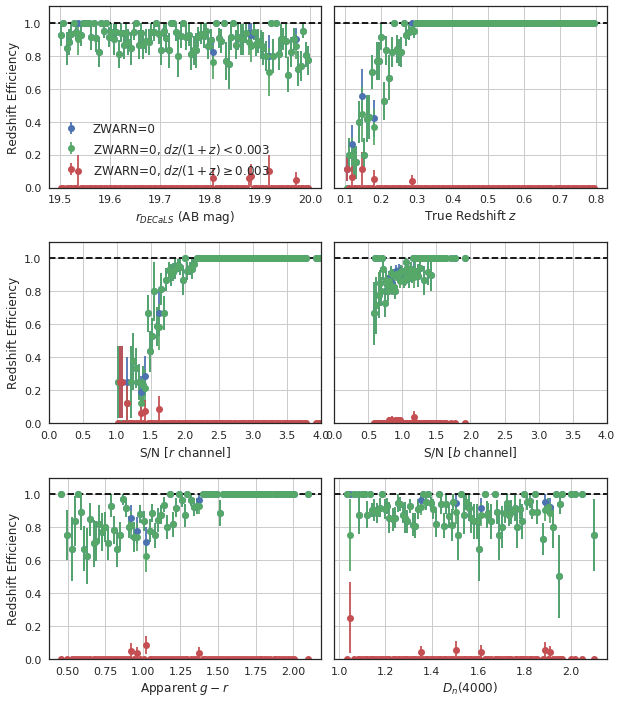

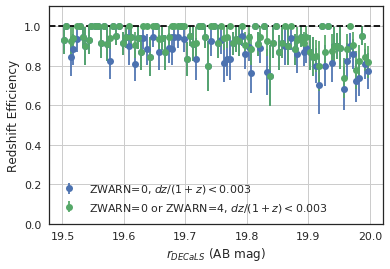

In [16]:
# sim 16
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        #result.pprint()
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=20.)
        qa_efficiency(result)
        qa_zwarn4(result)   

## Sim 26

In [17]:
current_sim_name = 'sim26'

In [18]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim26
	Sim Parameters: 
		suffix: sim26
		use_mock: False
		nsim: 2
		nspec: 800
		zmin: 0.1
		zmax: 0.8
		rmagmin: 19.5
		rmagmax: 20.0
		seed: 4264
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 20
		EXPTIME: 480
		MOONFRAC: 0.8


Sim: sim26 with nspec: 800 and nsim: 2
ObsConds ExpTime: 480, MoonFrac: 0.8, MoonAlt: 30, MoonSep: 20


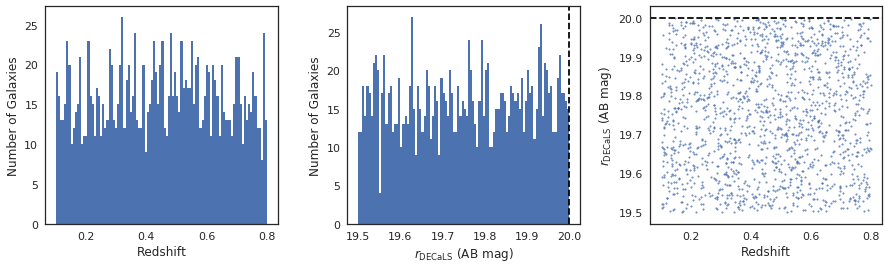

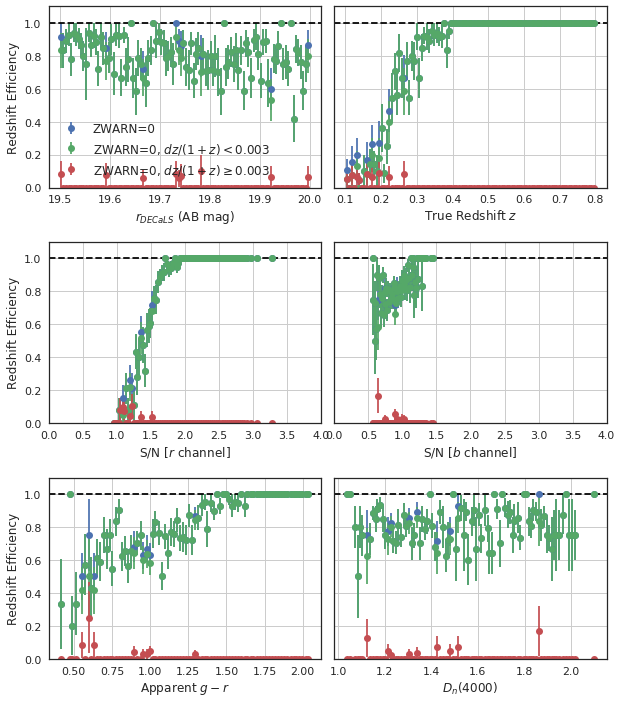

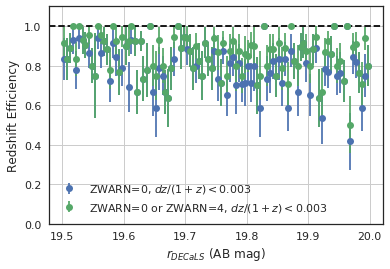

In [19]:
# sim 26
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        #result.pprint()
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=20.)
        qa_efficiency(result)
        qa_zwarn4(result)   

## Sim 36

In [20]:
current_sim_name = 'sim36'

In [21]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim36
	Sim Parameters: 
		suffix: sim36
		use_mock: False
		nsim: 2
		nspec: 800
		zmin: 0.1
		zmax: 0.8
		rmagmin: 19.5
		rmagmax: 20.0
		seed: 5904
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 90
		MOONSEP: 20
		EXPTIME: 480
		MOONFRAC: 0.99


Sim: sim36 with nspec: 800 and nsim: 2
ObsConds ExpTime: 480, MoonFrac: 0.99, MoonAlt: 90, MoonSep: 20


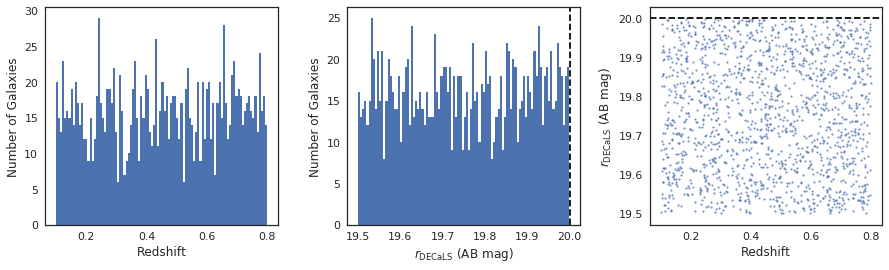

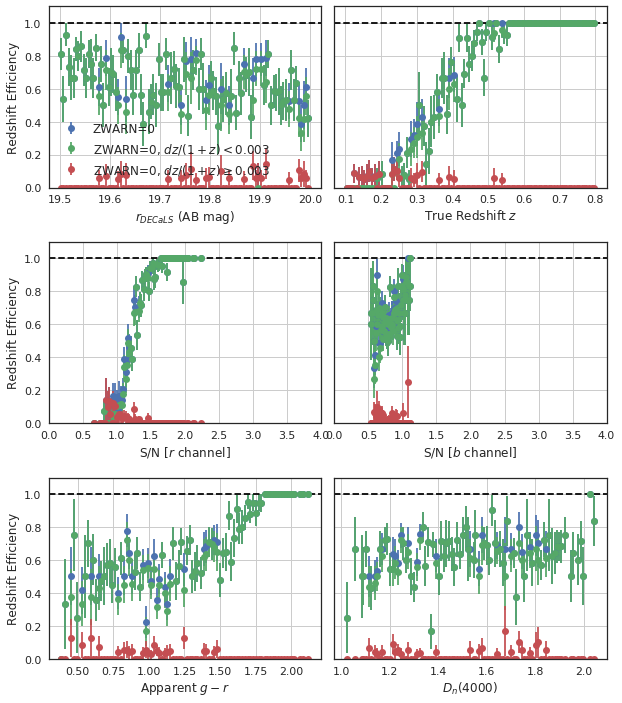

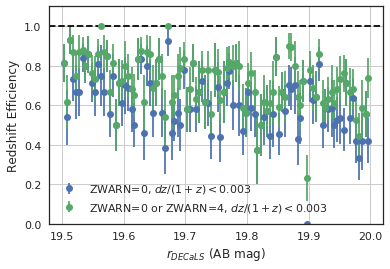

In [22]:
# sim 36
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        #result.pprint()
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=20.)
        qa_efficiency(result)
        qa_zwarn4(result)   

## Sim 46

In [23]:
current_sim_name = 'sim46'

In [24]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim46
	Sim Parameters: 
		suffix: sim46
		use_mock: False
		nsim: 2
		nspec: 800
		zmin: 0.1
		zmax: 0.8
		rmagmin: 19.5
		rmagmax: 20.0
		seed: 7544
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 90
		MOONSEP: 20
		EXPTIME: 300
		MOONFRAC: 0.99


Sim: sim46 with nspec: 800 and nsim: 2
ObsConds ExpTime: 300, MoonFrac: 0.99, MoonAlt: 90, MoonSep: 20


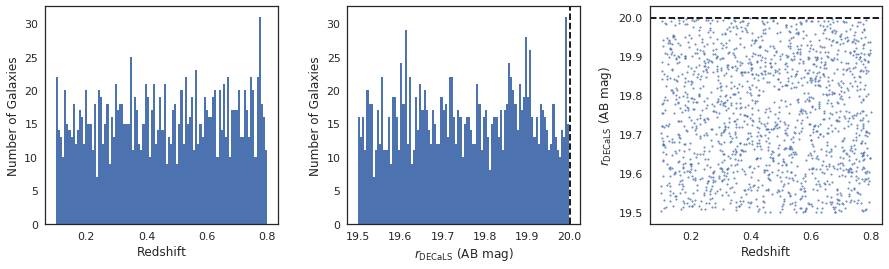

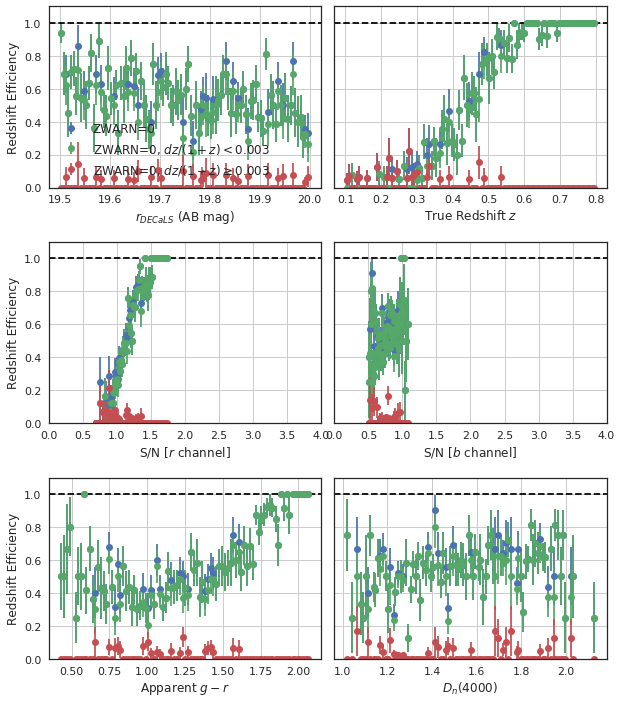

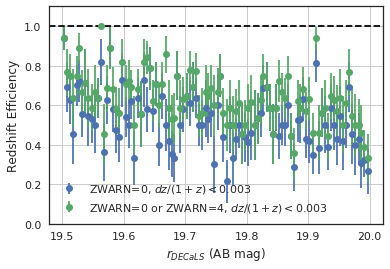

In [25]:
# sim 46
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        #result.pprint()
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=20.)
        qa_efficiency(result)
        qa_zwarn4(result)   